In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

print dataset

In [ ]:
dataset = pd.read_csv("Pedestrian_Counting_System_-_Monthly__counts_per_hour_.csv")
dataset.head()

,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
0,2887628,11/1/2019 17:00,2019,November,1,Friday,17,34,Flinders St-Spark La,300
1,2887629,11/1/2019 17:00,2019,November,1,Friday,17,39,Alfred Place,604
2,2887630,11/1/2019 17:00,2019,November,1,Friday,17,37,Lygon St (East),216
3,2887631,11/1/2019 17:00,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
4,2887632,11/1/2019 17:00,2019,November,1,Friday,17,36,Queen St (West),774


check null value in the column

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ID             1048575 non-null  int64 
 1   Date_Time      1048575 non-null  object
 2   Year           1048575 non-null  int64 
 3   Month          1048575 non-null  object
 4   Mdate          1048575 non-null  int64 
 5   Day            1048575 non-null  object
 6   Time           1048575 non-null  int64 
 7   Sensor_ID      1048575 non-null  int64 
 8   Sensor_Name    1048575 non-null  object
 9   Hourly_Counts  1048575 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 80.0+ MB


Drop the column that we dont need it  to predict the customer data in shopping mall.

In [ ]:
dataset = dataset.drop(['ID','Date_Time','Sensor_Name'],axis=1)

In [ ]:
#Display dataset after we drop the column 
dataset.head()

,Year,Month,Mdate,Day,Time,Sensor_ID,Hourly_Counts
0,2019,November,1,Friday,17,34,300
1,2019,November,1,Friday,17,39,604
2,2019,November,1,Friday,17,37,216
3,2019,November,1,Friday,17,40,627
4,2019,November,1,Friday,17,36,774


In [ ]:
dataset.shape

(1048575, 7)

In [ ]:
# Change day with numeric value
dataset = dataset.replace({"Day":{"Monday": 1,"Tuesday": 2,"Wednesday": 3,"Thursday": 4,"Friday": 5,"Saturday": 6,"Sunday": 7}})

In [ ]:
#Change month with numeric value.
dataset = dataset.replace({"Month":{"January": 1,"February": 2,"March": 3,"April": 4,"May": 5,"June": 6,"July": 7,"August": 8,"September": 9,"October": 10,"November": 11,"December": 12}})

In [ ]:
dataset.head()

,Year,Month,Mdate,Day,Time,Sensor_ID,Hourly_Counts
0,2019,11,1,5,17,34,300
1,2019,11,1,5,17,39,604
2,2019,11,1,5,17,37,216
3,2019,11,1,5,17,40,627
4,2019,11,1,5,17,36,774


In [ ]:
# X(Independent variables) and y(target variables) 
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(X)
print(y)


[[2019   11    1    5   17   34]
 [2019   11    1    5   17   39]
 [2019   11    1    5   17   37]
 ...
 [2015    3    1    7   19    3]
 [2015    3    1    7   19    4]
 [2015    3    1    7   19    5]]
[ 300  604  216 ... 2144 1497 1709]


Split the data with training and test dataset

In [ ]:
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

Build The Model

In [ ]:
# Parameter Tuning

In [ ]:
MSE = []

for k in range(10):
    k = k + 1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)
    MSE.append(mse)
    print("k =", k, "MSE :", mse)

k = 1 MSE : 336331.5590062704
k = 2 MSE : 209196.52141835348
k = 3 MSE : 167411.13635489432
k = 4 MSE : 152711.0663224495
k = 5 MSE : 150004.86209207735
k = 6 MSE : 149557.008984018
k = 7 MSE : 148671.96909449995
k = 8 MSE : 147790.91544819754
k = 9 MSE : 147620.2697749415
k = 10 MSE : 147239.27826488327


In [ ]:
# The best Knn_score is 10 because it has a small MSE 
knn_score = mean_squared_error(y_test,pred_knn)
print(knn_score)

147239.27826488327


In [ ]:
#KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=10).fit(X_train,y_train)
pred_knn = knn_model.predict(X_test)

In [ ]:
predict_df = pd.DataFrame({"y_Test" : y_test, "y_Predicted" : pred_knn})
predict_df.head()

,y_Test,y_Predicted
0,842,1048.4
1,295,417.2
2,248,294.7
3,505,659.7
4,45,16.7


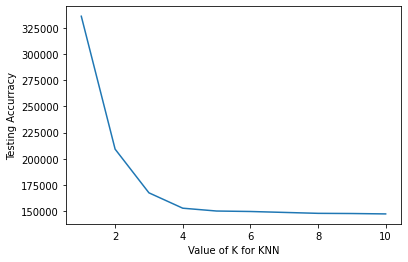

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1,11,1), MSE)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accurracy");